# Anomaly Detection Examples with Time Series Data by pyod KNN

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P198 の例 別解

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from pyod.models.knn import KNN

%matplotlib inline

/Users/masatoshi/pyenvs/anno/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/masatoshi/pyenvs/anno/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### データの読み込み

In [2]:
url = 'http://www.cs.ucr.edu/~eamonn/discords/qtdbsel102.txt'
df = pd.read_csv(url, sep='\t', header=None, index_col=0)

### 訓練用、検証用データの分割とスライディングウィンドウ法によるデータのベクトル化

In [3]:
x = df[1]

In [4]:
n = len(x)
w = 100

In [5]:
xtr = x.iloc[0:3000].to_numpy()
dtr = np.array([ xtr[i:i+w].copy() for i in range(3000 - w) ])

In [6]:
xval = x.iloc[3001:6000].to_numpy()
dval = np.array([ xval[i:i+w].copy() for i in range(3000 - w) ])

### 最近傍法の適用

In [7]:
knn = KNN()
knn.fit(dtr)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

### 学習済みモデルによる評価

In [8]:
distances = knn.decision_function(dval)

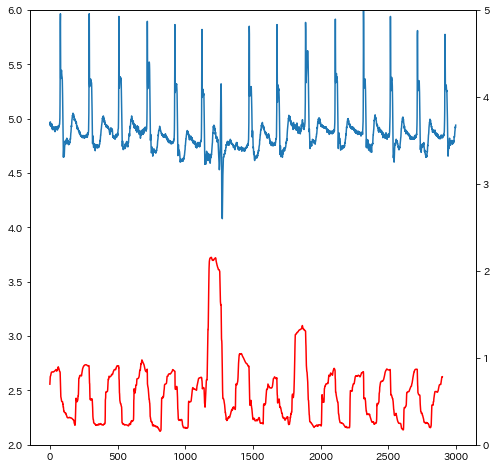

In [9]:
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.plot(xval)
ax1.set_ylim(2, 6)
ax2 = ax1.twinx()
ax2.plot(distances, 'r')
ax2.set_ylim(0,5)
plt.show()